In [46]:
from bs4 import BeautifulSoup
from fake_useragent import UserAgent
import requests
import time
import csv
import matplotlib.pyplot as plt
import numpy as np
from prettytable import PrettyTable

In [4]:
def user_parser (j, id):
    url = "https://api.vk.com/method/users.get.xml?user_ids="+id[1:]+"&fields=home_town"
    r = requests.get(url)
    page = BeautifulSoup(r.text, 'html.parser')
    try:
        answer = [{'number': str(j),'url': id, 'id': page.uid.get_text(), 'home town': page.home_town.get_text()}]
    except AttributeError:
        answer = [{'number': str(j),'url': id, 'id': page.uid.get_text(), 'home town': 'Error'}]
    try:
        writer.writerows(answer)
    except UnicodeEncodeError:
        answer = [{'number': str(j), 'url': id, 'id': page.uid.get_text(), 'home town': 'Mudak'}]
        writer.writerows(answer)
    time.sleep(0.33)

In [5]:
ua = UserAgent()
print(ua.chrome)
header = {'User-Agent':str(ua.chrome)}
print(header)

Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/32.0.1664.3 Safari/537.36
{'User-Agent': 'Mozilla/5.0 (Windows NT 4.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/37.0.2049.0 Safari/537.36'}


In [ ]:
path = "Home_Town.csv"
j=0
bdate=17

answer = [{'number': 'dict','url': 'dict', 'id': 'dict', 'home town': 'dict'}]
with open(path, 'w', newline='') as file:
    writer = csv.DictWriter(file, fieldnames=answer[0])
    writer.writeheader()
    while bdate<=25:
        sex=1
        while sex<=2:
            i=1
            while i<=48:
                if i==0:
                    url = "https://vk.com/search?c%5Bage_from%5D="+str(bdate)+"&c%5Bage_to%5D="+str(bdate)+"&c%5Bcity%5D=2&c%5Bcountry%5D=1&c%5Bname%5D=1&c%5Bper_page%5D=40&c%5Bphoto%5D=1&c%5Bsection%5D=people&c%5Bsex%5D="+str(sex)+"&c%5Buniversity%5D=56&offset=0"
                else:
                    url = "https://vk.com/search?c%5Bage_from%5D="+str(bdate)+"&c%5Bage_to%5D="+str(bdate)+"&c%5Bcity%5D=2&c%5Bcountry%5D=1&c%5Bname%5D=1&c%5Bper_page%5D=40&c%5Bphoto%5D=1&c%5Bsection%5D=people&c%5Bsex%5D="+str(sex)+"&c%5Buniversity%5D=56&offset="+str(20+i*20)
                r=requests.get(url, headers=header)
                print(r.ok)
                page = BeautifulSoup(r.text, 'html.parser')
                #print(page.prettify())
                tags=page.findAll("div", {"class":"labeled name"})
                #print (tags)
                print('Page', i+1)
                for tag in tags:
                    some=tag.findAll("a", {"class": None})
                    for link in some:
                        j=j+1
                        print (j,')' ,link.get('href'))
                        user_parser(j, link.get('href'))
                i=i+1
                time.sleep(0.33)
            sex=sex+1
        bdate=bdate+1

In [37]:
path = "Home_Town.csv"
users = []
cities = []
with open(path, "r", newline="") as file:
    reader = csv.reader(file)
    i=0
    for row in reader:
        if row[3] == "Error" or row[3] == '' or row[3] == "Mudak":
            i=i
        elif i==0:
            users.append(row)
            #print(row)
            i = i + 1
        else:
            row[0]=i
            users.append(row)
            #print(row)
            i=i+1
Num_people=len(users)
for j in range(len(users)):
    if          users[j][3] == 'Санкт - Петербург' or \
                users[j][3] == 'Санкт Петербург' or\
                users[j][3] == 'СПб' or\
                users[j][3] == 'Питер' or\
                users[j][3] == 'Saint-Petersburg' or \
                users[j][3] == 'Петербург' or \
                users[j][3] == 'Санкт-петербург' or \
                users[j][3] == 'Санкт- Петербург' or \
                users[j][3] == 'Санкт-Петербург ' or\
                users[j][3] == 'санкт-петербург':
        cities.append('Санкт-Петербург')
    else:
        cities.append(users[j][3])
c=list(set(cities))

for i in range(len(c)):  #считаем города, которые встречаются один раз, мусором и статистически не важными. Удаляем мусор
    if cities.count(c[i])==1:
        cities.remove(c[i])
c=list(set(cities))

c1=[]
calc=[]
for i in range(len(c)):
    c1.append(cities.count(c[i]))
for i in range(len(c)):
    calc.append([c1[i],c[i]])
calc.sort(reverse=True)
print(calc)

[[1251, 'Санкт-Петербург'], [21, 'Норильск'], [21, 'Мурманск'], [19, 'Уфа'], [18, 'Екатеринбург'], [17, 'Челябинск'], [16, 'Тольятти'], [16, 'Сургут'], [16, 'Северодвинск'], [15, 'Череповец'], [15, 'Архангельск'], [14, 'Петрозаводск'], [13, 'Краснодар'], [13, 'Владивосток'], [11, 'Хабаровск'], [11, 'Набережные Челны'], [11, 'Москва'], [11, 'Колпино'], [11, 'Брянск'], [11, 'Барнаул'], [10, 'Якутск'], [10, 'Уральск'], [10, 'Сыктывкар'], [10, 'Самара'], [10, 'Омск'], [10, 'Магнитогорск'], [10, 'Костанай'], [10, 'Кемерово'], [9, 'Ставрополь'], [9, 'Сочи'], [9, 'Смоленск'], [9, 'Оренбург'], [9, 'Мирный'], [9, 'Калининград'], [9, 'Гатчина'], [9, 'Выборг'], [9, 'Великий Новгород'], [9, 'Saint-P'], [9, 'Cанкт-Петербург'], [8, 'Торжок'], [8, 'Тихвин'], [8, 'СПБ'], [8, 'Петропавловск-Камчатский'], [8, 'Нижневартовск'], [8, 'Донецк'], [8, 'Великие Луки'], [8, 'Алматы'], [7, 'Ярославль'], [7, 'Ухта'], [7, 'Псков'], [7, 'Пермь'], [7, 'Орск'], [7, 'Новосибирск'], [7, 'Новокузнецк'], [7, 'Красноярск'

In [67]:
city=['Город']
city_num=['Число студентов, чел']
city_percent=['В процентном соотношении, %']
for i in range(len(calc)):
    city_num.append(calc[i][0])
    city_percent.append(calc[i][0]*100/Num_people)
    city.append(calc[i][1])
print('Число анализируемых пользователей =', Num_people)
th=['N' ,city[0], city_num[0], city_percent[0]]
table = PrettyTable(th)
for i in range(25):
    i=i+1
    table.add_row([i ,city[i], city_num[i], round(city_percent[i],2)])
print(table)

Число анализируемых пользователей = 3076
+----+------------------+----------------------+-----------------------------+
| N  |      Город       | Число студентов, чел | В процентном соотношении, % |
+----+------------------+----------------------+-----------------------------+
| 1  | Санкт-Петербург  |         1251         |            40.67            |
| 2  |     Норильск     |          21          |             0.68            |
| 3  |     Мурманск     |          21          |             0.68            |
| 4  |       Уфа        |          19          |             0.62            |
| 5  |   Екатеринбург   |          18          |             0.59            |
| 6  |    Челябинск     |          17          |             0.55            |
| 7  |     Тольятти     |          16          |             0.52            |
| 8  |      Сургут      |          16          |             0.52            |
| 9  |   Северодвинск   |          16          |             0.52            |
| 10 |    Ч

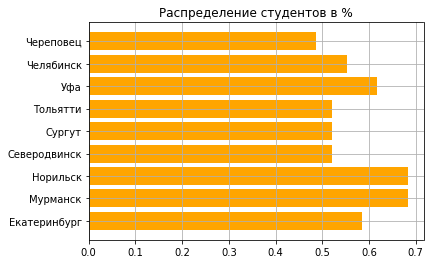

In [70]:
fig = plt.figure()
axes = fig.add_subplot (1, 1, 1)
plt.barh(city[2:11], city_percent[2:11], align='center', color='orange')
axes.set_xscale ('linear')
plt.title('Распределение студентов в %')
plt.grid(True)   # линии вспомогательной сетки
plt.show()